In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import *
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools

# Cross-validation results (50 molecules)

In [5]:
chyline_RT = pd.read_table("inset_results/Chyline_RT_trial.601/predictions", sep= " ")
chyline_LnRF = pd.read_table("inset_results/Chyline_LnRF_trial.828/predictions", sep= " ")

x1 = chyline_LnRF["Exp_LnRF.observed"]
y1 = chyline_LnRF[["Exp_LnRF.predicted.repeat"+str(i) for i in [1,2,3,4,5]]].mean(axis=1)
std1 = chyline_LnRF[["Exp_LnRF.predicted.repeat"+str(i) for i in [1,2,3,4,5]]].std(axis=1)

x2 = chyline_RT["Exp_RT.observed"]
y2 = chyline_RT[["Exp_RT.predicted.repeat"+str(i) for i in [1,2,3,4,5]]].mean(axis=1)
std2 = chyline_RT[["Exp_RT.predicted.repeat"+str(i) for i in [1,2,3,4,5]]].std(axis=1)

Text(0, 0.5, 'Predicted $t_R$')

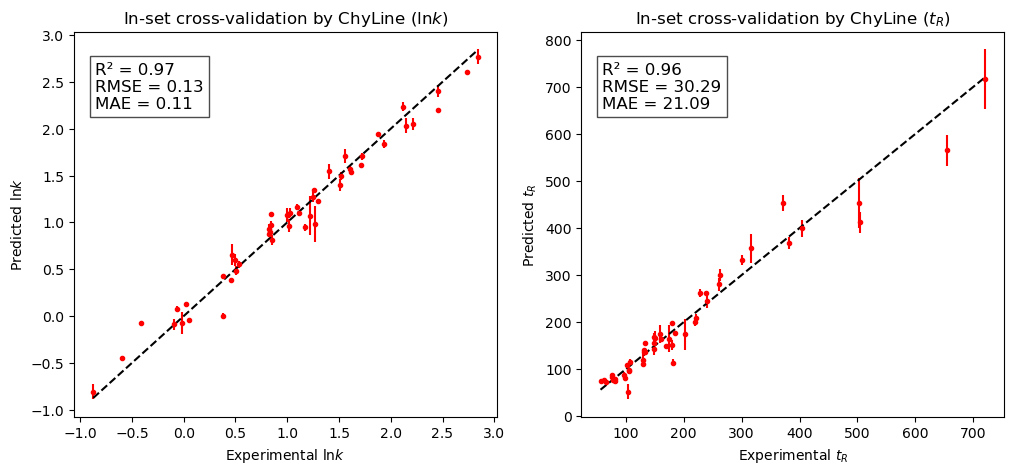

In [7]:
rmse1 = root_mean_squared_error(x1, y1)
mae1 = mean_absolute_error(x1, y1)
r2_1 = r2_score(x1, y1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].errorbar(x1, y1, yerr=std1, color='r', fmt=".")
axes[0].plot([x1.min(), x1.max()],[x1.min(), x1.max()], "--", color="k")
metrics_text = f"R² = {r2_1:.2f}\nRMSE = {rmse1:.2f}\nMAE = {mae1:.2f}"
axes[0].text(0.05, 0.8, metrics_text, transform=axes[0].transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7))
axes[0].set_title(r"In-set cross-validation by ChyLine (ln$k$)")
axes[0].set_xlabel(r"Experimental ln$k$")
axes[0].set_ylabel(r"Predicted ln$k$")

rmse2 = root_mean_squared_error(x2, y2)
mae2 = mean_absolute_error(x2, y2)
r2_2 = r2_score(x2, y2)

axes[1].errorbar(x2, y2, yerr=std2, color='r', fmt=".")
axes[1].plot([x2.min(), x2.max()],[x2.min(), x2.max()], "--", color="k")
metrics_text = f"R² = {r2_2:.2f}\nRMSE = {rmse2:.2f}\nMAE = {mae2:.2f}"
axes[1].text(0.05, 0.8, metrics_text, transform=axes[1].transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7))
axes[1].set_title(r"In-set cross-validation by ChyLine ($t_R$)")
axes[1].set_xlabel(r"Experimental $t_R$")
axes[1].set_ylabel(r"Predicted $t_R$")

# External prediction (in-set, 14 molecules)

In [8]:
import doptools
import pickle
from chython import smiles

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [11]:
with open("inset_results/rebuild_best_LnRF_chyline_828_SVR/SVR_trial828_chyline_2_7.pkl", "rb") as f:
    LnRF_chyline = pickle.load(f)

training_data_LnRF = pd.read_csv("inset_results/50_training_amide_Exp_LnRF_220.csv")
LnRf_mols = [smiles(c) for c in training_data_LnRF["SMILES"]]
LnRF_chyline.fit(LnRf_mols, training_data_LnRF["Exp_LnRF"])

test_set_LnRf = pd.read_excel("inset_results/test_set_14_amide_LnRF.xlsx")
test_mols = [smiles(c) for c in test_set_LnRf["SMILES"]]
chyline_test_set_LnRF_pred = LnRF_chyline.predict(test_mols)

In [14]:
with open("inset_results/rebuild_best_RT_chyline_601_SVR/SVR_trial601_chyline_2_5.pkl", "rb") as f:
    RT_chyline = pickle.load(f)

training_data_RT = pd.read_csv("inset_results/50_training_amide_Exp_RT_220.csv")
mols = [smiles(c) for c in training_data_RT["SMILES"]]
RT_chyline.fit(mols,training_data_RT["Exp_RT"])

test_set_RT = pd.read_excel("inset_results/test_set_14_amide_RT.xlsx")
test_mols = [smiles(c) for c in test_set_RT["SMILES"]]
chyline_test_set_RT_pred = RT_chyline.predict(test_mols)

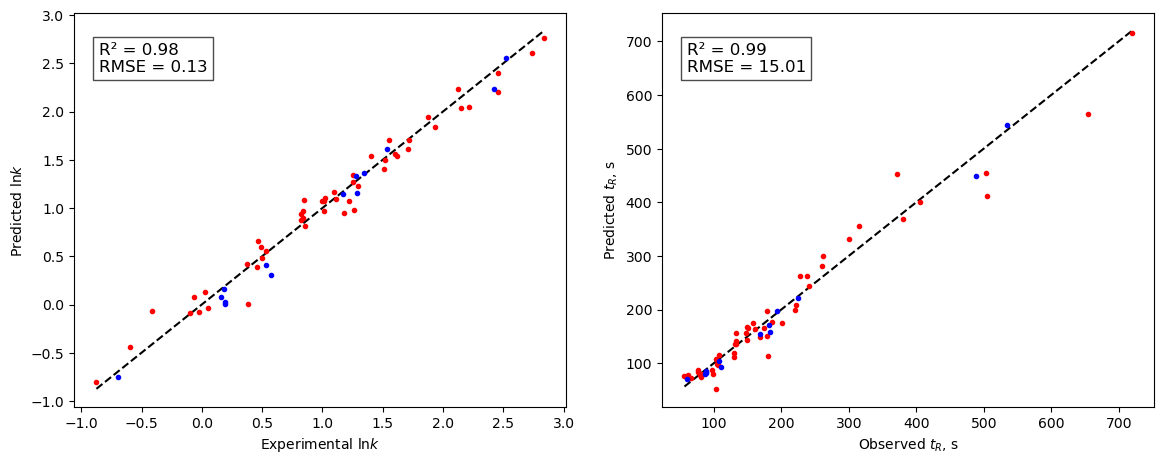

In [15]:
x3 = test_set_LnRf["Exp_LnRF"]
y3 = chyline_test_set_LnRF_pred

rmse3 = root_mean_squared_error(x3, y3)
mae3 = mean_absolute_error(x3, y3)
r2_3 = r2_score(x3, y3)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].errorbar(x1, y1, color='r', fmt=".")
axes[0].errorbar(x3, y3, color='b', fmt=".")
axes[0].plot([x1.min(), x1.max()],[x1.min(), x1.max()], "--", color="k")
metrics_text = f"R² = {r2_3:.2f}\nRMSE = {rmse3:.2f}"
axes[0].text(0.05, 0.85, metrics_text, transform=axes[0].transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7))

axes[0].set_xlabel(r"Experimental ln$k$")
axes[0].set_ylabel("Predicted ln$k$")

x4 = test_set_RT["Exp_RT"]
y4 = chyline_test_set_RT_pred
rmse4 = root_mean_squared_error(x4, y4)
r2_4 = r2_score(x4, y4)

axes[1].errorbar(x2, y2, color='r', fmt=".")
axes[1].errorbar(x4, y4, color='b', fmt=".")
axes[1].plot([x2.min(), x2.max()],[x2.min(), x2.max()], "--", color="k")
metrics_text = f"R² = {r2_4:.2f}\nRMSE = {rmse4:.2f}"
axes[1].text(0.05, 0.85, metrics_text, transform=axes[1].transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7))

axes[1].set_xlabel(r"Observed $t_R$, s")
axes[1].set_ylabel(r"Predicted $t_R$, s")
plt.tight_layout(pad=2)
#plt.savefig("External 14 mol.png", dpi=300)